
# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

## Xception Architecture Begins Here

In [11]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.0'

#### Load Image Data

In [12]:
DATA_LIST = os.listdir('Covid_Data_GradientCrescent/all/train')
DATASET_PATH  = 'Covid_Data_GradientCrescent/all/train'
TEST_DIR =  'Covid_Data_GradientCrescent/all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 50
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model

In [14]:
from tensorflow.keras import models, layers, optimizers

xception = tf.keras.applications.Xception(weights="imagenet", include_top=False, input_shape=(224,224,3))

model_xception = tf.keras.models.Sequential([
    xception,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu", name='dense_feature'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")
])

model_xception.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               25690368  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 46,552,876
Trainable params: 46,498,348
Non-trainable params: 54,528
_____________________________________

#### [5 points] Train Model

In [15]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

from keras import optimizers

model_xception.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

output = model_xception.fit(train_batches,
                 validation_data = valid_batches,
                 validation_steps = STEP_SIZE_VALID,
                 batch_size = BATCH_SIZE,
                 steps_per_epoch =STEP_SIZE_TRAIN,
                 epochs= NUM_EPOCHS)

7
2


/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
6/6 [==============================] - 132s 22s/step - loss: 1.6369 - accuracy: 0.2826 - val_loss: 1.7080 - val_accuracy: 0.3438
Epoch 2/50
6/6 [==============================] - 127s 21s/step - loss: 1.1329 - accuracy: 0.5272 - val_loss: 1.2803 - val_accuracy: 0.4688
Epoch 3/50
6/6 [==============================] - 132s 22s/step - loss: 1.1097 - accuracy: 0.5978 - val_loss: 2.2748 - val_accuracy: 0.2188
Epoch 4/50
6/6 [==============================] - 111s 19s/step - loss: 0.8181 - accuracy: 0.6667 - val_loss: 1.4605 - val_accuracy: 0.4375
Epoch 5/50
6/6 [==============================] - 114s 19s/step - loss: 0.7053 - accuracy: 0.6576 - val_loss: 2.0104 - val_accuracy: 0.4062
Epoch 6/50
6/6 [==============================] - 109s 18s/step - loss: 0.6057 - accuracy: 0.7391 - val_loss: 1.6936 - val_accuracy: 0.3750
Epoch 7/50
6/6 [==============================] - 97s 16s/step - loss: 0.5459 - accuracy: 0.7880 - val_loss: 2.0396 - val_accuracy: 0.2812
Epoch 8/50
6/6 [=====

In [16]:
model_xception.save('Xception_Multiclass.h5')

#### [5 points] Plot Accuracy and Loss During Training

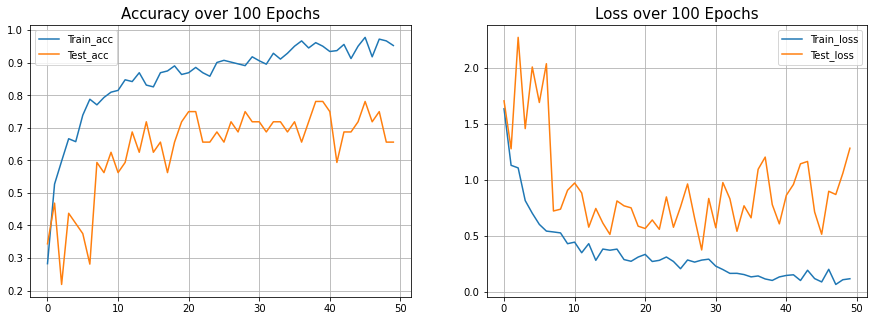

In [17]:
import matplotlib.pyplot as plt

def plot_accuracy_loss_training(output, epochs):
    training_accuracy = output.history['accuracy']
    training_loss = output.history['loss']
    validation_accuracy = output.history['val_accuracy']
    validation_loss = output.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(0,NUM_EPOCHS), training_accuracy[:], label='Train_acc')
    plt.plot(range(0,NUM_EPOCHS), validation_accuracy[:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(0,NUM_EPOCHS), training_loss[:], label='Train_loss')
    plt.plot(range(0,NUM_EPOCHS), validation_loss[:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
        
plot_accuracy_loss_training(output, 100)

#### Testing Model

In [18]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
model_xception = keras.models.load_model('Xception_Multiclass.h5')
x = model_xception.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 5s 138ms/step - loss: 1.0454 - accuracy: 0.7500
Test loss: 1.0453734397888184
Test accuracy: 0.75


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
270/270 [==============================] - 44s 162ms/step


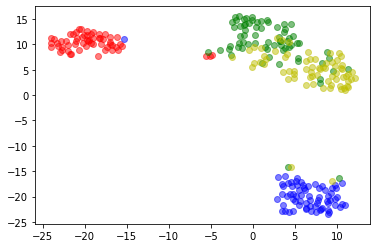

In [20]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from tensorflow import keras

intermediate_layer_model = tf.keras.models.Model(inputs=model_xception.input,
                                        outputs=model_xception.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

tsne_data_generator.reset()
activations = intermediate_layer_model.predict_generator(tsne_data_generator, verbose=1)
tsne = TSNE(random_state=42, n_components=2).fit_transform(activations)

for index, tsne in enumerate(tsne):
    if tsne_data_generator.labels[index] == 0:
        plt.scatter(tsne[0], tsne[1], color = 'r', alpha=0.5)
    elif tsne_data_generator.labels[index] == 1:
        plt.scatter(tsne[0], tsne[1], color = 'b', alpha=0.5)
    elif tsne_data_generator.labels[index] == 2:
        plt.scatter(tsne[0], tsne[1], color = 'g', alpha=0.5)
    else:
        plt.scatter(tsne[0], tsne[1], color = 'y', alpha=0.5)
plt.show()

## ----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x----x---x---x---

# Architecture 2 (ResNetV2) Begins Here

In [21]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.3.0'

In [22]:
DATA_LIST = os.listdir('Covid_Data_GradientCrescent/all/train')
DATASET_PATH  = 'Covid_Data_GradientCrescent/all/train'
TEST_DIR =  'Covid_Data_GradientCrescent/all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 50
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [24]:
from tensorflow.keras import models, layers, optimizers

resnet50v2 = tf.keras.applications.ResNet50V2(weights="imagenet", include_top=False, input_shape=(224,224,3))

model_resnet50v2 = tf.keras.models.Sequential([
    resnet50v2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu", name='dense_feature'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")
])

model_resnet50v2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               25690368  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 49,256,196
Trainable params: 49,210,756
Non-trainable params: 45,440
_________________________________________________________________


In [25]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

from keras import optimizers

model_resnet50v2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['accuracy'])

output = model_resnet50v2.fit(train_batches,
                 validation_data = valid_batches,
                 validation_steps = STEP_SIZE_VALID,
                 batch_size = BATCH_SIZE,
                 steps_per_epoch =STEP_SIZE_TRAIN,
                 epochs= NUM_EPOCHS)

7
2


/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Applications/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
6/6 [==============================] - 61s 10s/step - loss: 2.6517 - accuracy: 0.3315 - val_loss: 2.1742 - val_accuracy: 0.3750
Epoch 2/50
6/6 [==============================] - 60s 10s/step - loss: 1.5166 - accuracy: 0.5761 - val_loss: 3.0785 - val_accuracy: 0.3750
Epoch 3/50
6/6 [==============================] - 57s 9s/step - loss: 1.3592 - accuracy: 0.5815 - val_loss: 2.0084 - val_accuracy: 0.4688
Epoch 4/50
6/6 [==============================] - 59s 10s/step - loss: 1.0066 - accuracy: 0.6630 - val_loss: 2.8739 - val_accuracy: 0.3438
Epoch 5/50
6/6 [==============================] - 57s 9s/step - loss: 0.8916 - accuracy: 0.6576 - val_loss: 1.9295 - val_accuracy: 0.3750
Epoch 6/50
6/6 [==============================] - 56s 9s/step - loss: 0.6571 - accuracy: 0.7120 - val_loss: 1.8892 - val_accuracy: 0.3438
Epoch 7/50
6/6 [==============================] - 56s 9s/step - loss: 0.6693 - accuracy: 0.7337 - val_loss: 1.8156 - val_accuracy: 0.4688
Epoch 8/50
6/6 [===============

In [26]:
model_resnet50v2.save('Resnet50v2_Multiclass.h5')

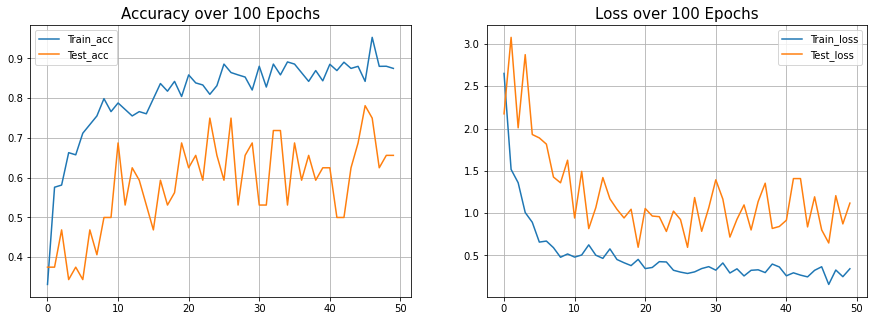

In [27]:
import matplotlib.pyplot as plt

def plot_accuracy_loss_training(output, epochs):
    training_accuracy = output.history['accuracy']
    training_loss = output.history['loss']
    validation_accuracy = output.history['val_accuracy']
    validation_loss = output.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(0,NUM_EPOCHS), training_accuracy[:], label='Train_acc')
    plt.plot(range(0,NUM_EPOCHS), validation_accuracy[:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(0,NUM_EPOCHS), training_loss[:], label='Train_loss')
    plt.plot(range(0,NUM_EPOCHS), validation_loss[:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
        
plot_accuracy_loss_training(output, 100)

In [28]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
model_resnet50v2 = keras.models.load_model('Resnet50v2_Multiclass.h5')
x = model_resnet50v2.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 4s 115ms/step - loss: 1.2000 - accuracy: 0.5000
Test loss: 1.2000336647033691
Test accuracy: 0.5


Found 270 images belonging to 4 classes.
270/270 [==============================] - 35s 131ms/step


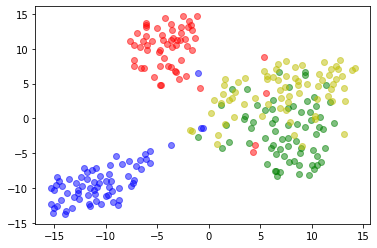

In [29]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
from tensorflow import keras

intermediate_layer_model = tf.keras.models.Model(inputs=model_resnet50v2.input,
                                        outputs=model_resnet50v2.get_layer('dense_feature').output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="binary")

tsne_data_generator.reset()
activations = intermediate_layer_model.predict_generator(tsne_data_generator, verbose=1)
tsne = TSNE(random_state=42, n_components=2).fit_transform(activations)

for index, tsne in enumerate(tsne):
    if tsne_data_generator.labels[index] == 0:
        plt.scatter(tsne[0], tsne[1], color = 'r', alpha=0.5)
    elif tsne_data_generator.labels[index] == 1:
        plt.scatter(tsne[0], tsne[1], color = 'b', alpha=0.5)
    elif tsne_data_generator.labels[index] == 2:
        plt.scatter(tsne[0], tsne[1], color = 'g', alpha=0.5)
    else:
        plt.scatter(tsne[0], tsne[1], color = 'y', alpha=0.5)
plt.show()

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Model -->